In [2]:
from importlib import reload
import cpclasses
reload(cpclasses)
from cpclasses import *
import torch



C:\Users\tobia\AppData\Local\Temp\ipykernel_3320\758091966.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ys = torch.tensor(ys, requires_grad = True)


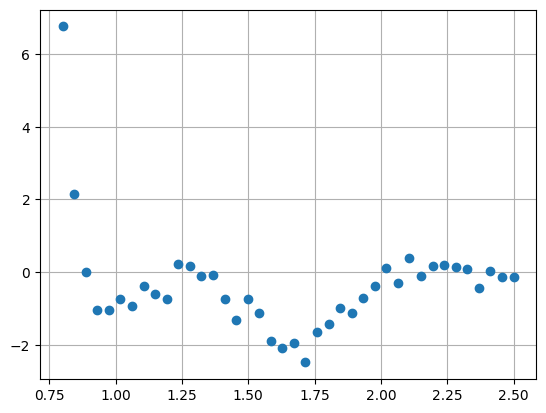

In [3]:
LJG = LennardJonesGaussTorch(eps = 2,  r0=1.7)

xs = torch.linspace(0.8, 2.5, 40, requires_grad = True)
ys = LJG._V(xs) + torch.randn(40)*0.3

ys = torch.tensor(ys, requires_grad = True)

fig,ax = plt.subplots()

with torch.no_grad():
    ax.plot(xs,ys , 'o', label = 'LJG with Noise')


ax.grid()


In [4]:
class DeepNetwork(torch.nn.Module,NeuralNetwork):

    def __init__(self, n_hidden = 1, n_neurons = 10, activation = 'tanh', **kwargs):
        torch.nn.Module.__init__(self)
        NeuralNetwork.__init__(self)
        self.n_hidden = n_hidden
        self.n_neurons = n_neurons
        match activation:
            case 'tanh':
                self.activation = torch.nn.Tanh()

            case 'relu':
                self.activation = torch.nn.ReLU()
            
            case 'silu':
                self.activation = torch.nn.SiLU()
            
            case _:
                raise ValueError(f'Activation function {activation} not implemented')

        self.layers = []
        self.layers.append(torch.nn.Linear(1, self.n_neurons))
        self.layers.append(self.activation)
        for i in range(self.n_hidden):
            self.layers.append(torch.nn.Linear(self.n_neurons, self.n_neurons))
            self.layers.append(self.activation)
        self.layers.append(torch.nn.Linear(self.n_neurons, 1))
        self.model = torch.nn.Sequential(*self.layers)

    def forward(self, x):
        x = x.view(-1,1)  
        x = self.model(x)
        x = x.flatten()
        return x

    def forward2(self,x):
        for layer in self.layers[:-1]:
            x = layer(x)
            x = self.activation(x)
        x = self.layers[-1](x)
        return x


    def predict(self, x):
        x = torch.tensor(x, dtype = torch.float32).reshape(-1,1)
        return self.model(x).detach().numpy().flatten()

In [5]:
DN = DeepNetwork(n_hidden = 1, n_neurons = 10, activation = 'tanh')
DN.fit(xs,ys, epochs = 10000, lr = 0.2)


In [6]:
DN2 = DeepNetwork(n_hidden = 4, n_neurons = 5, activation = 'tanh')
DN2.fit(xs,ys, epochs = 10000, lr = 0.2)


In [12]:
DN3 = DeepNetwork(n_hidden = 3, n_neurons = 10, activation = 'relu')
DN3.fit(xs,ys, epochs = 10000, lr = 0.1)


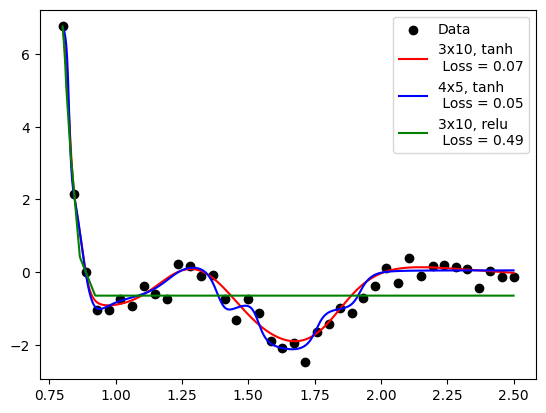

In [13]:
fig, ax = plt.subplots()

DN.plot(ax, xs, ys, model_label='3x10, tanh', model_color = 'red')
DN2.plot(ax, xs, ys, model_label='4x5, tanh', model_color = 'blue', plot_data = False)
DN3.plot(ax, xs, ys, model_label='3x10, relu', model_color = 'green', plot_data = False)

ax.legend()